tensorflow를 이용하여 multi varible multi class logistic regression 문제를 풀어봅니다.

(300, 3)
(300, 3)


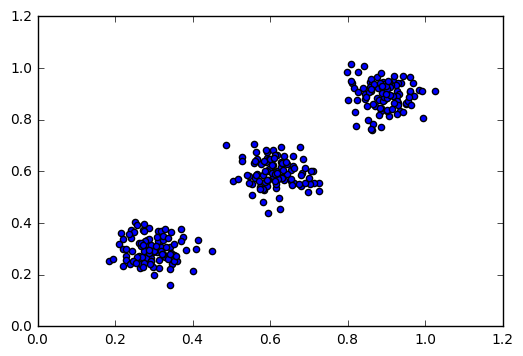

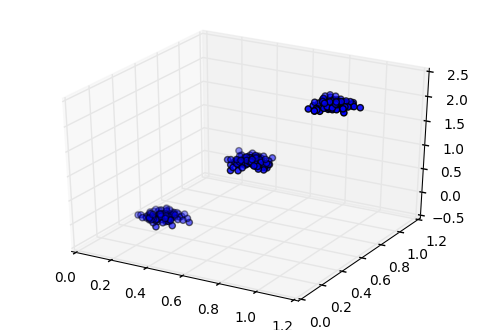

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# x 변수가 2개이고, y 가 3개의 클래스를 가지는 데이터를 생성합니다.
# 행렬 곱만으로 y를 계산하기 위해 x_data의 첫번째 row를 1.0 으로 셋팅합니다.
x_0 = np.ones([300, 1])
x_1a = np.random.normal(0.3, 0.05, (100, 1))
x_1b = np.random.normal(0.6, 0.05, (100, 1))
x_1c = np.random.normal(0.9, 0.05, (100, 1))
x_1 = np.concatenate((x_1a, x_1b, x_1c), axis = 0)
x_2a = np.random.normal(0.3, 0.05, (100, 1))
x_2b = np.random.normal(0.6, 0.05, (100, 1))
x_2c = np.random.normal(0.9, 0.05, (100, 1))
x_2 = np.concatenate((x_2a, x_2b, x_2c), axis = 0)
x_data = np.concatenate((x_0, x_1, x_2), axis = 1)
x_data = np.float32(x_data)

# 클래스가 3개인 분류 문제에 대해서는 softmax를 이용합니다.
# softmax를 이용하기 위해서 y 값 one hot 인코딩합니다.
# class 0: [1, 0, 0], class 1: [0, 1, 0], class 2: [0, 0, 1]
y_data = np.zeros([300, 3])
y_data[0:100, 0] = 1
y_data[100:200, 1] = 1
y_data[200:300, 2] = 1
y_data = np.float32(y_data)

print x_data.shape
print y_data.shape

# x_data를 출력해 class 를 3개 클러스터를 가지고 있음을 확인해봅니다.
plt.scatter(x_data[:, 1], x_data[:, 2], label="2d")
plt.show()

# 3차원 그래프로 y_data 까지 확인해봅니다.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_data[:, 1], x_data[:, 2], np.argmax(y_data, 1), label="3d")
plt.show()

In [2]:
import tensorflow as tf

In [3]:
# 행렬 곱으로 y 값을 계산하기 위해 
# x_data가 300x3 행렬이므로 Weight를 3x3 행렬로 생성하여 one hot 코드를 출력하도록합니다.
# y 값에 sigmod 대신 softmax 함수를 적용합니다.
W = tf.Variable(tf.random_uniform([3, 3], 0.5, 0.5))
y = tf.nn.softmax(tf.matmul(x_data, W))
print y.get_shape

<bound method Tensor.get_shape of <tf.Tensor 'Softmax:0' shape=(300, 3) dtype=float32>>


In [4]:
# loss 함수로는 cross entropy 함수를 이용합니다.
# y_data 값이 1일때 -tf.log(y) 로 미분 가능한 convex 형태로 one hot 코드에 최적화가 가능하게 됩니다.
loss = -tf.reduce_sum(y_data*tf.log(y))
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

step: 0, loss: 308.488861
step: 10000, loss: 1.523731
step: 20000, loss: 0.834970
training_accuracy: 1.0
Weight: [[ 30.54532051   6.04274845 -35.08542633]
 [-27.90824699   0.46864751  28.93857002]
 [-25.93026924   0.28348625  27.14565659]]


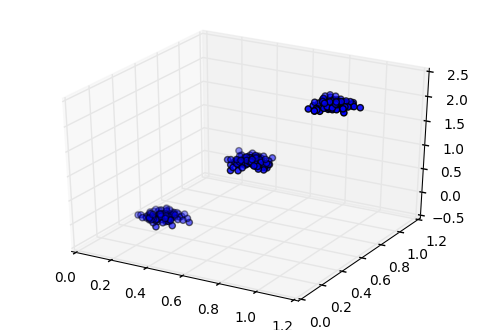

In [5]:
with tf.Session() as sess:
    init = tf.initialize_all_variables()
    sess.run(init)
    
    for step in xrange(30000):
        sess.run(train)
        if step % 10000 == 0:
            print "step: %d, loss: %f" % (step, sess.run(loss))
    
    # argmax 함수를 통해 softmax 값 중 최대 값의 index 를 클래스로 변환해줍니다.
    # softmax 의 결과가 [0.7, 0.1, 0.2]라 하면 argmax 를 통해 제일 큰 값인
    # 0.7 의 index 0 을 얻게 됩니다.
    predict_y = sess.run(tf.arg_max(y, 1))
    argmax_y = np.argmax(y_data, 1)
    
    training_accuracy = np.mean(np.equal(predict_y, argmax_y))
    print "training_accuracy: %s" % training_accuracy
    print "Weight: %s" % sess.run(W)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_data[:, 1], x_data[:, 2], predict_y)
    plt.show()